# Деревья решения

Дерево решений - простой метод машинного обучения с учителем для задач классификации и регрессии.

Как выглядит простое дерево решений:

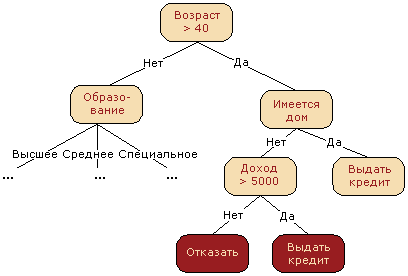


- В листьях содержиться значение целевой переменной (дали кредит/не дали, выжил/не выжил, котик/собачка/птичка и так далее).

- В узлах дерева содержиться признаки.

- На ребре содержиться значение признака.

- Верхний узел называется корневым.



## Как строится дерево

В машинном обучении деревья строятся от корня к листьям. Вначале выбирается корень и критерий (признак), по которому выборка разбивается пополам (или на несколько частей). Затем то же самое делается для каждого из потомков этого корня и так далее до остановки. Задача на каждом этапе состоит в выборе способа разбиения каждого узла, то есть в выборе значения порога, с которым будет сравниваться значение одного из признаков в каждом узле.

В узлах дерева решений значения признаков, по которым необходимо разделить выборку.

Каждый раз нужно делать это таким образом, чтобы получить самое полезное знание об объекте данных, или, говоря более формально, максимальный **прирост информации**.

На практике это означает, что нужно разбить данные таким образом, чтобы в обеих частях после этого они оказались наиболее упорядочены. В этом может помочь понятие **энтропии** – меры хаоса, или неупорядоченности в системе. Ее можно рассчитать по следующей формуле:

$H(x) = -\sum_{i=1}^{n} p_i*log_2p_i$

Где $n$ — количество возможных вариантов, а $p_i$ – вероятность одного из них.

Энтропия является мерой примесей в датасете (или его неоднородности, хаоса, неупорядоченности).

Для построения дерева используется мера на основе энтропии, которая называется **приростом информации (Information Gain, IG)**. Это мера по сути показывает снижение энтропии при разделении данных.

И считается по формуле:

$IG(H,A) = Entropy(H) - \sum_{v  \in values(A)} \frac{|S_v|}{S}*Entropy(H_v)$

Где $values(A)$ - все возможные значения атрибута А.

$H_v$ - энтропия для Атрибута А со значением v.

**Как выбирается тот или иной признак для разбиения?**

Корневой узел выбирается так, чтобы было наилучшее разбиение. Наилучшим разбиением считается такое, которое максимально уменьшает значение энтропии и увеличивает прирост информации.

Подробнее о том как работает энтропия в деревьях:
https://habr.com/ru/company/ods/blog/322534/

## Пример

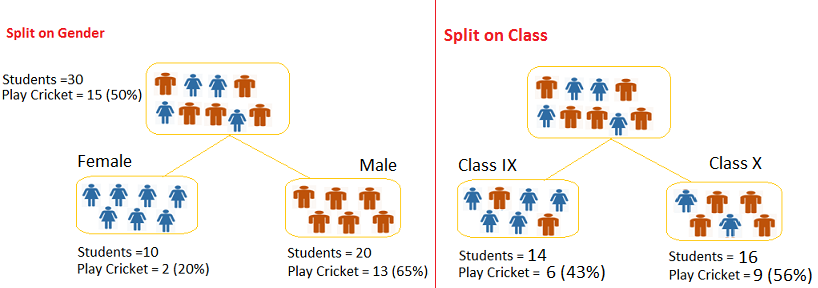

Допустим есть некоторый набор данных:

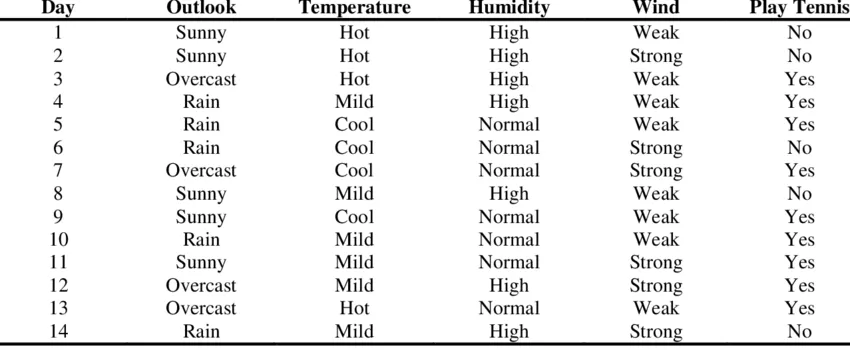

Общая энтропия исходного набора данных:

$H((9+, 5-) = -\frac{9}{14}*log_2(\frac{9}{14}) - \frac{5}{14}*log_2(\frac{5}{14}) = 0.94$

Видим, что исходный датасет неоднороден на 94%.

Если у нас допустим, в датасете данные только одного класса, то энтропия в этом случае равна:

$H(14+, 0-) = -\frac{14}{14}*log_2(\frac{14}{14}) - \frac{0}{14}*log_2(\frac{0}{14}) = 0$

Т.е. в этом случае у нас полностью однороный датасет, т.е. максимально упорядоченный.


$Values(Outlook) = Sunny, Overcast, Rain$

$H(9+, 5-) = 0.94$

$H_{sunny}(2+,3-) = -\frac{2}{5}*log_2(\frac{2}{5}) - \frac{3}{5}*log_2(\frac{3}{5}) = 0.971$

$H_{Overcast}(4+,0-) = -\frac{4}{4}*log_2(\frac{4}{4}) - \frac{0}{4}*log_2(\frac{0}{4}) = 0$

$H_{Rain}(3+,2-) = -\frac{3}{5}*log_2(\frac{3}{5}) - \frac{2}{5}*log_2(\frac{2}{5}) = 0.971$

Прирост информации:

$G(S, Outlook) = H - (\frac{5}{14}*H_{sunny}+\frac{4}{14}*H_{Overcast}+\frac{5}{14}*H_{Rain}) = 0.94 - (\frac{5}{14}*0.971 + \frac{4}{14}*0 + \frac{5}{14}*0.971) = 0.246$

Посчитайте, прирост для остальныйх переменных.

Какой признак будет наиболее оптимальным для корневого узла?

In [ ]:
# calculate the entropy for a Outlook
from math import log2

E_sunny = -(2/5 * log2(2/5) + 3/5 * log2(3/5))
E_overcast = -(4/4 * log2(4/4) + 0/4 * log2(0/4))
E_rain = -(3/5 * log2(3/5) + 2/5 * log2(2/5))

print(E_sunny)
print(E_overcast)
print(E_sunny)

ValueError: ignored

$G(S, Wind) = ?$

$G(S, Humidity) = ?$

$G(S, Temperature) = ?$

# Практический пример

Классификатор:

`class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)`

Регрессор:

`class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)`

Параметры дерева.

- `criterion`: какой критерий для разбиения использовать (коэффицент джини или энтропию)

- `max_depth`: максимальная глубина дерева — точка, на которой останавливается разбиение узлов. Это похоже на выбор максимального количества слоев в глубокой нейронной сети. Меньшее количество сделает модель быстрой, но не точной. Большее количество увеличивает точность, но создает риски переобучения и замедляет процесс.

- `min_samples_split`: необходимое минимальное количество выборок для разбиения узлов. Мы уже обсуждали это выше вместе с тем, как настроить высокое значение, чтобы минимизировать переобучение.

- `max_features`: число признаков для поиска лучшей точки для разбиения. Чем больше число, тем лучше результат. Но в этом случае обучение займет больше времени.

- `min_impurity_split`: порог для ранней остановки роста дерева. Узел разобьется только в том случае, если его точность будет выше указанного порога. Такой метод может служить в качестве компромисса между минимизацией переобучения (высокое значение, маленькое дерево) и высокой точностью (низкое значение, большое дерево).

- `presort`: выбор того, нужно ли предварительно сортировать данные для ускорения поиска наилучшего разбиения при подборе. Если данные заранее отсортируются по каждому признаку, то алгоритму обучения будет гораздо проще найти хорошие значения для разбиения.-

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/uciml/pima-indians-diabetes-database")

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


100%|██████████| 8.91k/8.91k [00:00<00:00, 13.1MB/s]

Ссылка на датасет:

https://www.kaggle.com/datasets/saurabh00007/diabetescsv

In [ ]:
import pandas as pd

df = pd.read_csv("/content/pima-indians-diabetes-database/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#выделим вектор ответов и вектор признаков
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=1/3, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=1)

clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

y_pred_tree

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Accuracy:", accuracy_score(y_test,y_pred_tree))
print("Recall:", recall_score(y_test,y_pred_tree))
print("Precision:", precision_score(y_test,y_pred_tree))

Accuracy: 0.72265625
Recall: 0.7209302325581395
Precision: 0.5688073394495413


In [ ]:
clf.feature_importances_ # важность признаков

array([0.        , 0.58403247, 0.05412678, 0.        , 0.        ,
       0.18525019, 0.0162374 , 0.16035315])

In [ ]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [ ]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

,Feature,Importance
0,Glucose,0.584032
1,BMI,0.185250
2,Age,0.160353
3,BloodPressure,0.054127
4,DiabetesPedigreeFunction,0.016237
5,Pregnancies,0.000000
6,SkinThickness,0.000000
7,Insulin,0.000000


<ipython-input-13-3d081ae1c3f4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')


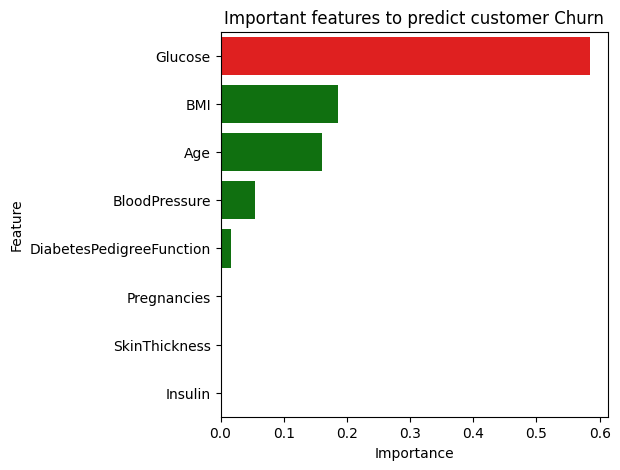

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

values = feat_df.Importance
idx = feat_df.Feature
plt.figure(figsize=(5,5))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

Визуализация дерева

https://mljar.com/blog/visualize-decision-tree/

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15), dpi=800)
_ = tree.plot_tree(clf,
                   feature_names=df.columns,
                   class_names=['0','1'],
                   filled=True)

# Задание

In [ ]:
from random import randint

competitions = ['https://www.kaggle.com/competitions/oilgas-field-prediction/data',
                'https://www.kaggle.com/competitions/critical-temperature-of-superconductors/data',
                'https://www.kaggle.com/competitions/weather-prediction/data',
                'https://www.kaggle.com/competitions/electricity-consumption/data']

students = pd.read_csv('Список учеников.csv')

students['var'] = ''

for index, row in students.iterrows():
    r = randint(0, 3)
    students.loc[index, 'var'] = competitions[r]